<font size="3">**Tarea 1**</font>

<u> *Instrucciones* </u>

Los resultados de los ejericicios propuestos se deben entregar como un notebook por correo el dia 14/9 hasta las 21:00. 
Además, es importante considerar que para que la revisión se pueda llevar a cabo, el código debe poder ejecutarse en cualquier computadora.

Las variables tienen la siguiente descripcion:

- vive_padre: si el padre vive en el hogar
- vive_madre: si la madre vive en el hogar
- n_personas: numero de integrantes del hogar
- n_habitaciones: numero de cuartos en el hogar
- cercania_juegos: hay juegos infantiles cerca de la vivienda (1=no, 2=si, 4=no sabe)
- cercania_servicios: hay serivicios de salud cerca de la vivienda (1=no, 2=si, 4=no sabe)
- edad_primer_parto: edad de la madre en su primer parto
- area: urbana=1, rural=0
- educm: años de escolaridad de la madre
- educp: años de escolaridad del padre

Preguntas:

1. Cargar la base de datos *junaeb.csv* en el ambiente. Identifique los tipos de datos que se encuentran en la base, realice estadisticas descriptivas sobre las variables importantes (Hint: Revisar la distribuciones, datos faltantes, outliers, etc.) y limpie las variables cuando sea necesario. 

2. Ejecute un modelo de probabilidad lineal (*MCO*) que permita explicar la probabilidad de que los padres se encuentren viviendo en el hogar (*vive_padre*). Seleccione las variables dependientes a incluir en el modelo final e interprete su significado. 
  
3. Ejecute un modelo *probit* que permita explicar la probabilidad de que los padres se encuentren viviendo en el hogar (*vive_padre*). Seleccione las variables dependientes a incluir en el modelo final e interprete su significado. 

4. Ejecute un modelo *logit*  que permita explicar la probabilidad de que los padres se encuentren viviendo en el hogar(*vive_padre*). Seleccione las variables dependientes a incluir en el modelo final e interprete su significado. 

5. Comente los resultados obtenidos en 2, 3 y 4. ¿Cuáles y por qué existen las diferencias entre los resultados?. En su opinión, ¿Cuál sería el más adecuado para responder la pregunta de investgación y por qué? ¿Qué variables resultaron ser robustas a la especificación?
  
6. Ejecute un modelo Poisson para explicar el número de personas que hay dentro de un hogar. (*n_personas*). Seleccione las variables dependientes a incluir en el modelo final e interprete su significado. 

7. Determine sobre dispersion y posible valor optimo de alpha para un modelo Binomial Negativa.

8. Usando la informacion anterior, ejecute un modelo Binomial Negativa para explicar el número de personas que hay dentro de un hogar. (*n_personas*). Seleccione las variables dependientes a incluir en el modelo final e interprete su significado. 
  
9. Comente los resultados obtenidos en 6, 7 y 8. ¿Cuáles y por qué existen las diferencias entre los resultados?. En su opinión, ¿Cuál sería el más adecuado para responder la pregunta de investgación y por qué? ¿Qué variables resultaron ser robustas a la especificación?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sklearn
import scipy 
from scipy.stats import shapiro
from scipy.stats import nbinom
import seaborn as sbn
import pingouin as pg

%matplotlib inline

In [2]:
juna = pd.read_csv('../data/junaeb.csv')

juna.info()
juna.dropna(inplace=True)
juna.reset_index(drop=True, inplace=True)
juna.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   vive_padre          6607 non-null   int64  
 1   vive_madre          6607 non-null   int64  
 2   n_personas          6472 non-null   float64
 3   n_habitaciones      6457 non-null   float64
 4   cercania_juegos     6475 non-null   float64
 5   cercania_servicios  6475 non-null   float64
 6   edad_primer_parto   6386 non-null   float64
 7   area                6607 non-null   int64  
 8   educm               6607 non-null   int64  
 9   educp               6607 non-null   int64  
dtypes: float64(5), int64(5)
memory usage: 516.3 KB


,vive_padre,vive_madre,n_personas,n_habitaciones,cercania_juegos,cercania_servicios,edad_primer_parto,area,educm,educp
0,0,1,3.0,4.0,1.0,1.0,25.0,1,0,0
1,0,1,5.0,3.0,1.0,1.0,23.0,1,13,13
2,1,1,5.0,3.0,1.0,1.0,19.0,1,12,17
3,1,1,4.0,2.0,1.0,1.0,27.0,1,6,13
4,1,1,5.0,3.0,2.0,1.0,20.0,1,13,16


**PREGUNTA 1**

Cargada la database, se identifica un total de 6607 muestras, donde se distingue la presencia de variables ficticias: vive_padre; vive_madre; area, cercania_juegos; cercania_servicios y, por otro lado, de variables cuantitativas: n_personas; n_habitaciones; edad_primer_parto; educm; educp.

A modo de limpiar la data, se removieron muestras que incluian valores NaN, es decir aquellas donde faltaban datos e información, debido a que podian generar conflicto para el analisis estadistico posterior, descartando un total de 228 muestras...

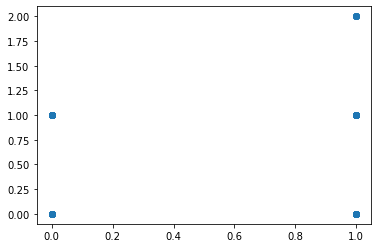

In [3]:
plt.scatter(juna['vive_padre'],juna['vive_madre'])

... por otro lado, si se grafican las variables dummy **vive_padre** y **vive_madre** es posible identificar outliers correspondientes a esta ultima variable en la parte superior derecha del gráfico, donde existen muestras cuyo valor es 2 y claramente se encuentra fuera del rango 0-1; se asumirá que esto se produjo debido a un error de tipeo y con el objetivo de no descartar más muestras se reemplazarán dichos valores por '1' para que no se produzca alguna alteración en la regresión del modelo.

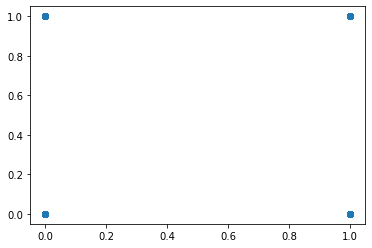

In [4]:
juna['vive_madre']=juna['vive_madre'].replace(2,1)
plt.scatter(juna['vive_padre'],juna['vive_madre'])

Como las variables cercania_juegos y cercania_servicios son categoricas, se crearán variables dicotómicas de ellas para facilitar la interpretacion de estas a la contribución de la variable dependiente si ese fuese el caso, donde al existir n=3 categorias por ambas variales, se harán (n-1)=2 variables ficticias por cada una de las dos variables ya nombradas, como sigue: 

- CercJuegos_no = {1: NO hay juegos infantiles cerca de la vivienda; 0: en otro caso}
- CercJuegos_si = {1: SI hay juegos infantiles cerca de la vivienda; 0: en otro caso}
Categoria de referencia: No sabe si hay juegos infantiles cerca de la vivienda

- CercServicios_no = {1: NO hay servicios cerca de la vivienda; 0: en otro caso}
- CercServicios_si = {1: SI hay servicios cerca de la vivienda; 0: en otro caso}
Categoria de referencia: No sabe si hay servicios cerca de la vivienda


Por ejemplo, si una muestra indica que CercJuegos_no = 0 y CercJuegos_si = 0, entonces esto quiere decir que la persona no sabe si existen juegos cerca de la vivienda.


In [5]:
juna['CercJuegos_no']=juna.cercania_juegos.map({1.0:1, 2.0:0, 4.0:0})
juna['CercJuegos_si']=juna.cercania_juegos.map({1.0:0, 2.0:1, 4.0:0})

juna['CercServicios_no']=juna.cercania_servicios.map({1.0:1, 2.0:0, 4.0:0})
juna['CercServicios_si']=juna.cercania_servicios.map({1.0:0, 2.0:1, 4.0:0})

juna.drop(['cercania_juegos'], axis=1, inplace=True)
juna.drop(['cercania_servicios'], axis=1, inplace=True)

juna.head()

,vive_padre,vive_madre,n_personas,n_habitaciones,edad_primer_parto,area,educm,educp,CercJuegos_no,CercJuegos_si,CercServicios_no,CercServicios_si
0,0,1,3.0,4.0,25.0,1,0,0,1,0,1,0
1,0,1,5.0,3.0,23.0,1,13,13,1,0,1,0
2,1,1,5.0,3.0,19.0,1,12,17,1,0,1,0
3,1,1,4.0,2.0,27.0,1,6,13,1,0,1,0
4,1,1,5.0,3.0,20.0,1,13,16,0,1,1,0


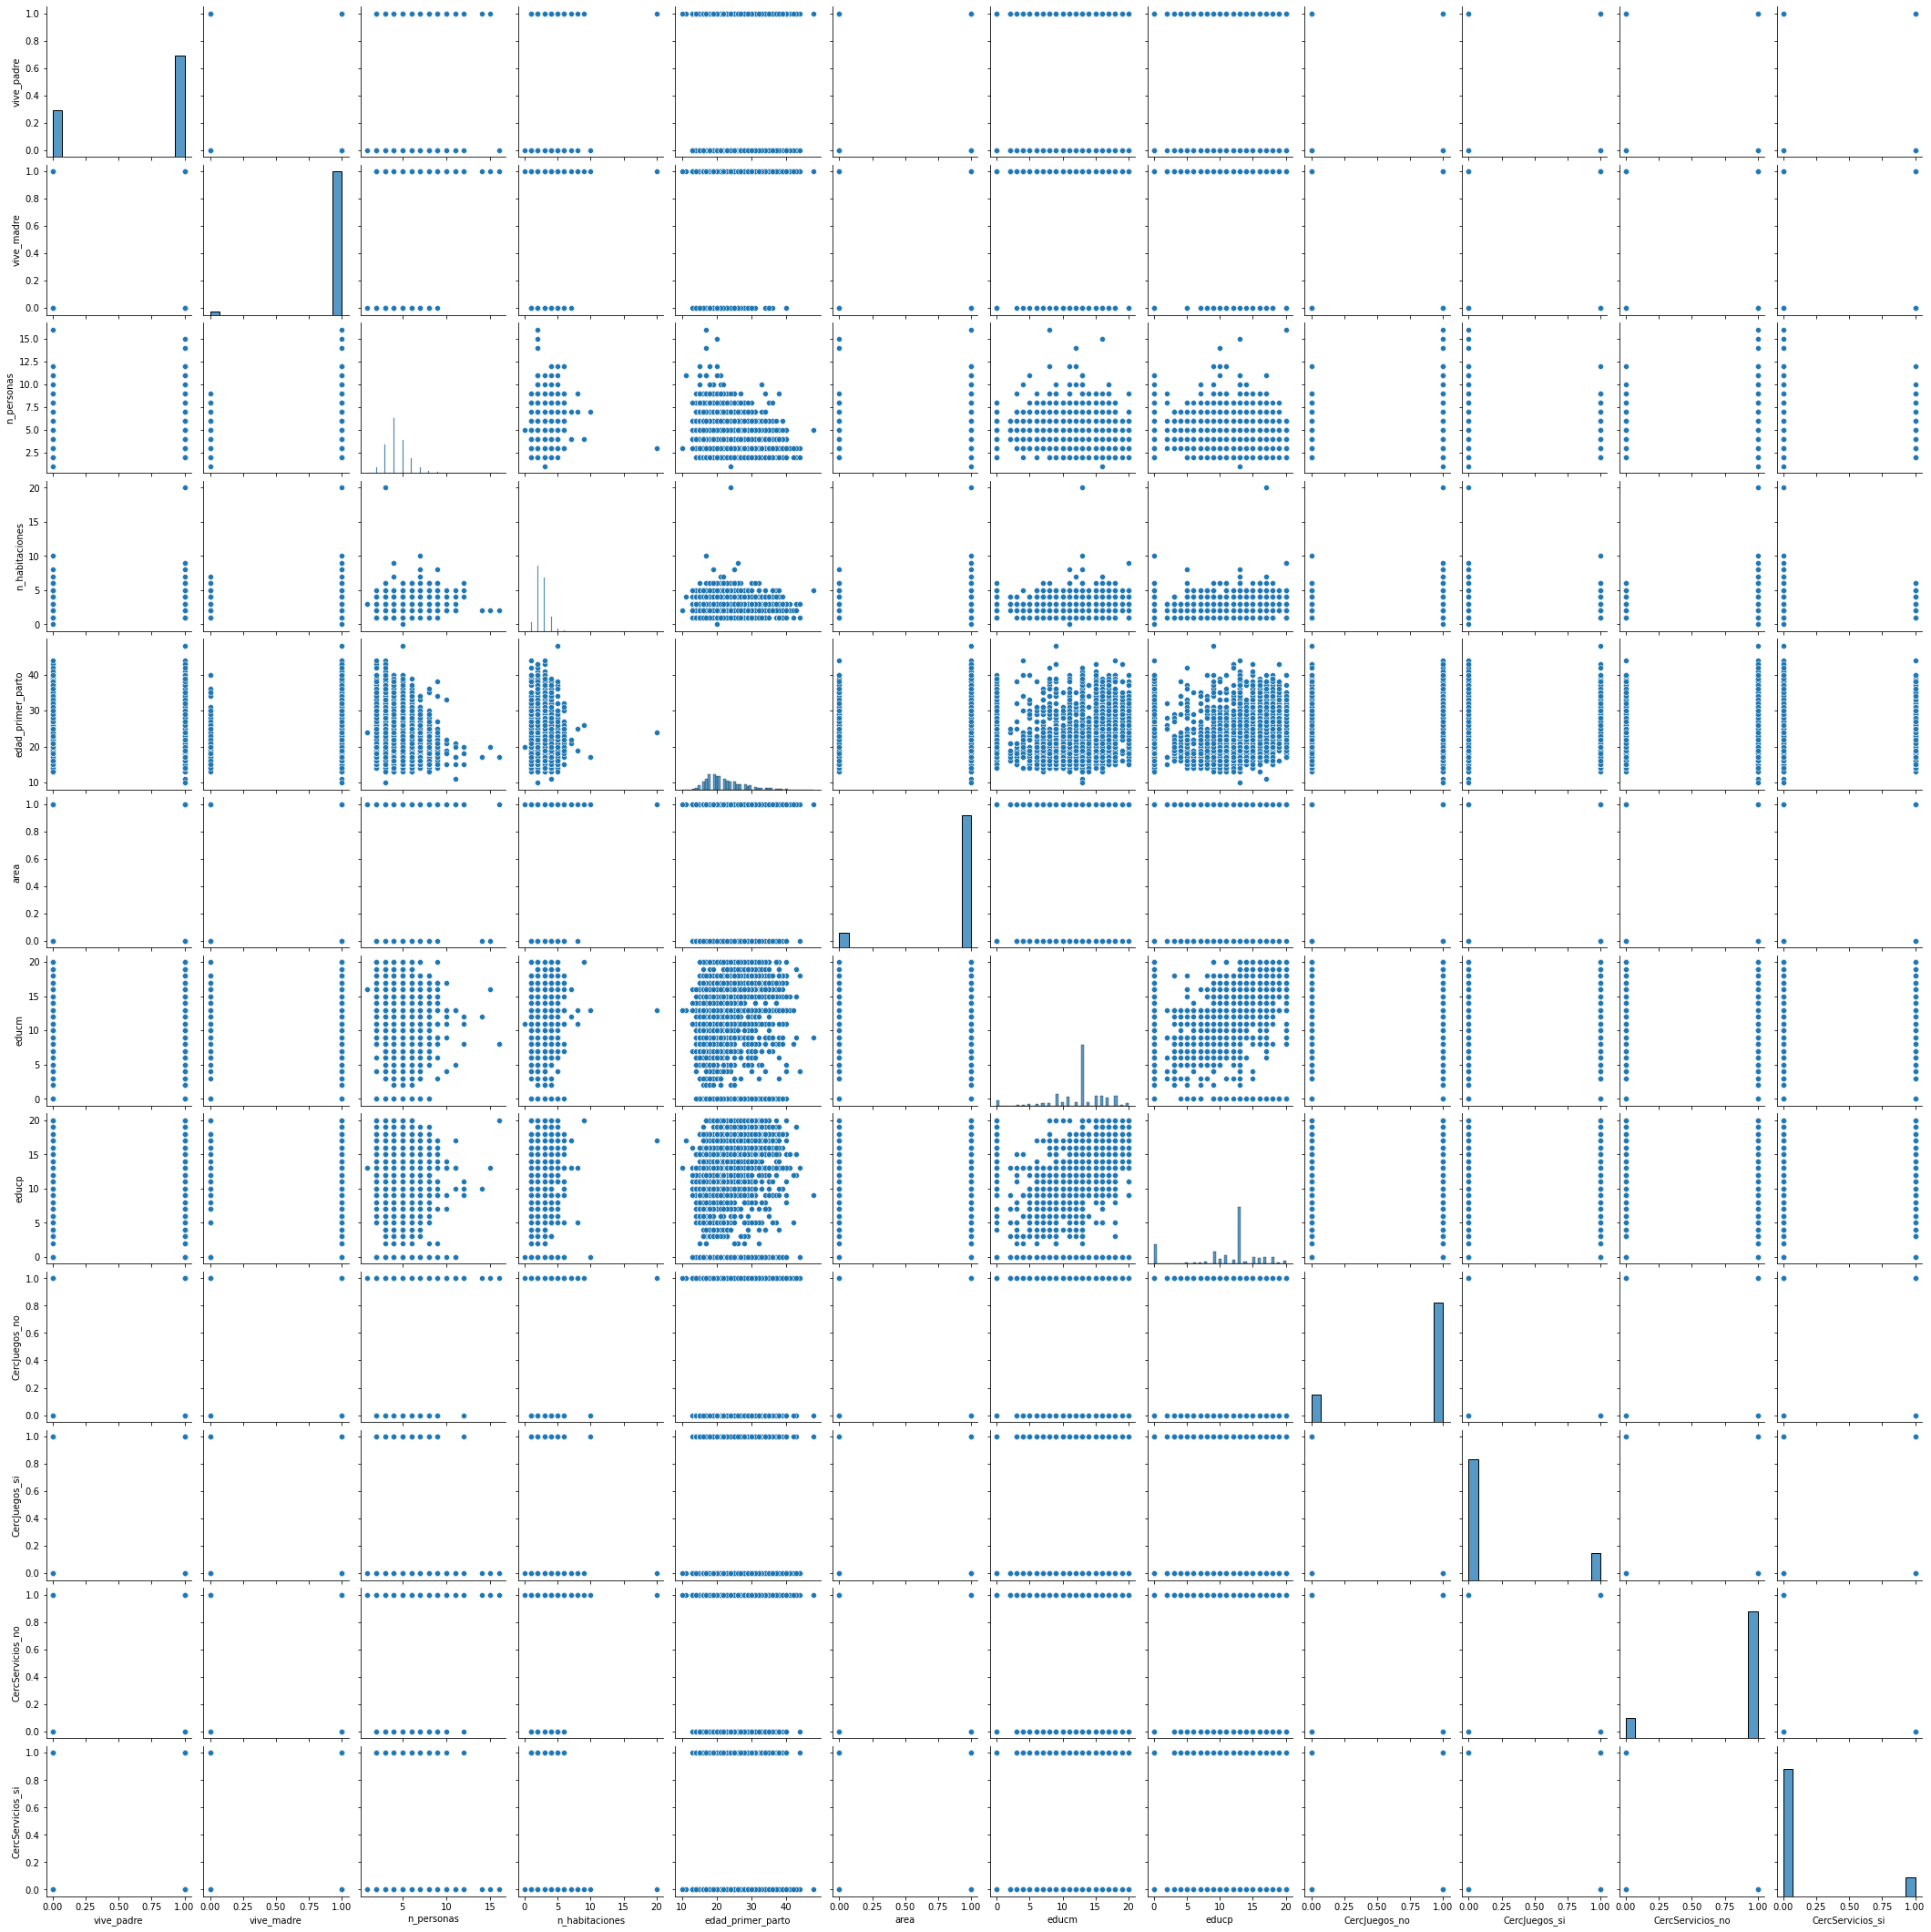

In [6]:
sbn.pairplot(juna)

A modo general, en base a la matriz de correlaciones entre variables presentada, lo que más llama la atención es que en las 6379 muestras hay una probabilidad mayor al 0.90 de que la madre se encuentre viviendo en el hogar, mientras que existe una probabilidad aproximada al 0.7 de que el padre se encuentre viviendo en el hogar; además la probabilidad de que la persona sea de area urbana es superior al 0.90 en base al gráfico.

In [7]:
#correlacion=juna.corr(method='spearman')
#correlacion

################################################

#corr = pg.pairwise_corr(juna, method='spearman')
#corr.sort_values(by=['p-unc'])[['X','Y','n','r','p-unc']]
#corr

### PREGUNTAS DESDE LA 2 HASTA LA 5

**PREGUNTA 2**

**Modelo OLS**

Para seleccionar las variables control que permitan explicar la variable dependiente en el modelo OLS, se utilizará el metodo backward, vale decir, primero se añaden todas las variables al modelo y a medida que resulte alguna como estadisticamente no significativa, se eliminará del modelo siempre y cuando al hacerlo no reduzca el R cuadrado ajustado; de modo que el modelo final resulte con el menor número de variables control y que además estas sean significativas.


In [8]:
y= juna['vive_padre']
#X =juna[['vive_madre','n_personas','n_habitaciones','CercJuegos_no','CercJuegos_si','CercServicios_no','CercServicios_si','area','edad_primer_parto','educp','educm']]

#Se elimina la variable CercServicios debido a que CercServicios_si tiene un valor p mayor a 0.1 y por lo tanto no es significativo
#X =juna[['vive_madre','n_personas','n_habitaciones','CercJuegos_no','CercJuegos_si','area','edad_primer_parto','educp','educm']]

#Se elimina la variable CercJuegos debido a que CercJuegos_no y CercJuegos_si tienen un valor p mayor a 0.1 y por lo tanto no es significativo
#X =juna[['vive_madre','n_personas','n_habitaciones','area','edad_primer_parto','educp','educm']]


X =juna[['vive_madre','n_personas','n_habitaciones','area','edad_primer_parto','educp','educm']]
X=sm.add_constant(X)
modelMCO=sm.OLS(y,X)
resultado_ols=modelMCO.fit()
print(resultado_ols.summary())


                            OLS Regression Results                            
Dep. Variable:             vive_padre   R-squared:                       0.169
Model:                            OLS   Adj. R-squared:                  0.168
Method:                 Least Squares   F-statistic:                     184.5
Date:                Thu, 15 Sep 2022   Prob (F-statistic):          9.61e-250
Time:                        05:22:01   Log-Likelihood:                -3568.7
No. Observations:                6379   AIC:                             7153.
Df Residuals:                    6371   BIC:                             7207.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1216      0.04

Como resultado de lo anterior se terminó por escoger las variables: **vive_madre; n_personas; n_habitaciones; area; edad_primer_parto; educp; edump** las cuales son significativas al 99% de confianza al tener un |t|> 2.575.

La interpretación de este modelo es, que al ser la variable dependiente limitada, cada uno de los coeficientes representan el cambio marginal en la probabilidad de ocurrencia de que, en este caso, el padre viva en el hogar.

Ejemplo:

Por cada año adicional de escolaridad del padre (educp), la probabilidad de que el padre vive en el hogar aumenta en 3.34 puntos porcentuales, siempre y cuando se mantengan las demás variables constantes.

Sin embargo este modelo tiene un problema, y es que puede darse el caso de que la variable dependiente, es decir, la probabilidad de exito de que el padre viva en el hogar, puede estar fuera del rango 0-1, y puede inducir a conclusiones equivocadas, por lo tanto usar OLS no es un buen modelo para explicar la variable dependiente.


**Pregunta 3**

**Modelo Probit**

Para seleccionar las variables dependientes se utilizará el metodo backward tal como en el modelo OLS, añadiendo todas las variables y a medida que resulte alguna como estadisticamente no significativa, se eliminará del modelo siempre y cuando al hacerlo no reduzca el R cuadrado ajustado; de modo que el modelo final resulte con el menor número de variables control y que además estas sean significativas, resultando el siguiente modelo probit:

In [9]:
y= juna['vive_padre']
#X =juna[['vive_madre','n_personas','n_habitaciones','CercJuegos_no','CercJuegos_si','CercServicios_no','CercServicios_si','area','edad_primer_parto','educp','educm']]

#CercJuegos es no significativo al tener un valor p > 0.1, se elimina la variable.
#X =juna[['vive_madre','n_personas','n_habitaciones','CercServicios_no','CercServicios_si','area','edad_primer_parto','educp','educm']]

#CercServicios es no significativo al tener un valor p > 0.1, se elimina la variable.
X =juna[['vive_madre','n_personas','n_habitaciones','area','edad_primer_parto','educp','educm']]

X=sm.add_constant(X)
modelProbit = sm.Probit(y, X)
resultado_probit = modelProbit.fit()
print(resultado_probit.summary())

mfx_probit = resultado_probit.get_margeff()
print(mfx_probit.summary())

Optimization terminated successfully.
         Current function value: 0.538390
         Iterations 5
                          Probit Regression Results                           
Dep. Variable:             vive_padre   No. Observations:                 6379
Model:                         Probit   Df Residuals:                     6371
Method:                           MLE   Df Model:                            7
Date:                Thu, 15 Sep 2022   Pseudo R-squ.:                  0.1353
Time:                        05:22:01   Log-Likelihood:                -3434.4
converged:                       True   LL-Null:                       -3971.8
Covariance Type:            nonrobust   LLR p-value:                8.543e-228
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.2132      0.156     -7.783      0.000      -1.519      -0.908
vive_mad

En este modelo, los coeficientes representan solamente el signo del cambio que tiene la variable dependiente y al cambiar en una unidad alguna variable explicativa; más bien son los cambios marginales dy/dx los que sí pueden ser utilizados para interpretar de forma correcta el efecto que tiene una variable contro en la variable dependiente y.

Por ejemplo, el aumentar una persona (1 unidad) en el hogar, hace que aumente 5.27 puntos porcentuales la probabilidad de que el padre viva en el hogar.

**PREGUNTA 4 y 5**

**Modelo Logit**

Para seleccionar las variables dependientes se utilizará el metodo backward, vale decir, primero se añaden todas las variables al modelo y a medida que resulte alguna como estadisticamente no significativa, se eliminará del modelo siempre y cuando al hacerlo no reduzca el R cuadrado ajustado; de modo que el modelo final resulte con el menor número de variables control y que además estas sean significativas.

In [10]:
y= juna['vive_padre']
#X =juna[['vive_madre','n_personas','n_habitaciones','CercJuegos_no','CercJuegos_si','CercServicios_no','CercServicios_si','area','edad_primer_parto','educp','educm']]

#CercJuegos es no significativo al tener un valor p > 0.1, se elimina la variable.
#X =juna[['vive_madre','n_personas','n_habitaciones','CercServicios_no','CercServicios_si','area','edad_primer_parto','educp','educm']]

X =juna[['vive_madre','n_personas','n_habitaciones','area','edad_primer_parto','educp','educm']]
X=sm.add_constant(X)
modelLogit = sm.Logit(y, X)
resultado_logit = modelLogit.fit()
print(resultado_logit.summary())

mfx = resultado_logit.get_margeff()
print(mfx.summary())

Optimization terminated successfully.
         Current function value: 0.535751
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:             vive_padre   No. Observations:                 6379
Model:                          Logit   Df Residuals:                     6371
Method:                           MLE   Df Model:                            7
Date:                Thu, 15 Sep 2022   Pseudo R-squ.:                  0.1395
Time:                        05:22:01   Log-Likelihood:                -3417.6
converged:                       True   LL-Null:                       -3971.8
Covariance Type:            nonrobust   LLR p-value:                4.504e-235
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -2.1363      0.267     -7.998      0.000      -2.660      -1.613
vive_mad

El modelo OLS es un modelo de probabilidad lineal, esto conlleva a que presente limitaciones en cuanto a las predicciones que se pueden realizar a la variable independiente, debido a que los valores predichos de probabilidad pueden escaparse del rango [0,1] y por ende no se puede llegar a una conclusión o interpretación correcta.

Lo que sí es seguro que puede predecir este modelo es el signo del cambio en la probabilidad de ocurrencia de vive_padre, es decir, el signo (+ o -) coincide con el de los coeficientes calculados con Probit y Logit.

En cambio, los modelos Probit y Logit en principio son no lineales, debido a que cambia la especificación de estos modelos utilizando una transformación a la probabilidad de ocurrencia de **viva_padre** de modo que los valores predichos esten bajo el rango [0,1], y por lo tanto la interpretación de los coeficientes del output de esos modelos de regresión es distinto a los de OLS; los coef que entrega OLS indican el cambio marginal en la variable explicada por el cambio en una unidad de la variable control, en cambio, para conocer el efecto que tiene el cambio de una variable, por ejemplo, cuantitativa en una unidad en la probabilidad de ocurrencia de **viva_padre**, se debe observar los efectos marginales dy/dx que entrega el output de estos modelos.

El modelo más adecuado para poder explicar la probabilidad de ocurrencia de que el padre viva en l hogar puede ser el modelo Probit o Logit, no existe mucha diferencia en los efectos maginales de dichos modelos y por ende de los resultados, y a comparación de OLS, sí se puede asegurar que la variable explicada se encuentre dentro del rango [0,1]. A juicio personal, seria más adecuado debido a que si se tuviera que explicar matemáticamente este modelo, es más sencillo hacer utilizando modelo Logit.

La variable **vive_madre** en los 3 modelos fue la que produce un mayor cambio en la variable dependiente **vive_padre**, tomando como ejemplo el modelo Logit: el que la madre viva en el hogar aumenta la probabilidad de que el padre viva en el hogar en 10.85 puntos porcentuales cuando las demás variables permanecen constantes.



### PREGUNTAS DESDE LA 6 HASTA LA 9

**Pregunta 6**

Al analizar la base de datos nuevamente, se hizo el hallazgo de que en las 6379 muestras, solo existe una observación para n_personas=14 y n_personas=16, es por esto que se consideran outliers y se omitirán del conjunto de valores en los que se realizará la regresión, además, se usará el método forward para poder ingresar las variables al modelo.

(array([ 263., 1226., 2385., 1451.,  637.,  242.,  111.,   44.,    8.,
          9.]), array([ 1. ,  2.1,  3.2,  4.3,  5.4,  6.5,  7.6,  8.7,  9.8, 10.9, 12. ]), <BarContainer object of 10 artists>)
                 Generalized Linear Model Regression Results                  
Dep. Variable:             n_personas   No. Observations:                 6376
Model:                            GLM   Df Residuals:                     6372
Model Family:                 Poisson   Df Model:                            3
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11484.
Date:                Thu, 15 Sep 2022   Deviance:                       1836.2
Time:                        05:22:01   Pearson chi2:                 1.89e+03
No. Iterations:                     5   Pseudo R-squ. (CS):            0.08969
Covariance Type:            nonrobust                                         
           

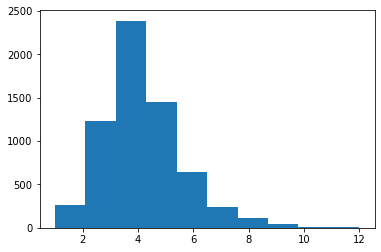

In [11]:
subset=juna.loc[juna['n_personas']<14]
y=subset['n_personas']

#X=subset[[]]

#Primero se ingresa la variable que es significativa y con mayor pseudo R^2
#X=subset[['n_habitaciones']]

#Luego de las demás variables la que mejor aporta al modelo y también es significativa con p < 0.01 es edad_primer_parto
#X=subset[['n_habitaciones','edad_primer_parto']]

#La tercera y ultima variable a ingresar con p < 0.01 es vive_padre
X=subset[['n_habitaciones','edad_primer_parto','vive_padre']]

X=sm.add_constant(X)

print(plt.hist(y))

Modelpoisson=sm.GLM(y,X,family=sm.families.Poisson()).fit()
print(Modelpoisson.summary())
print('fitted lambda',Modelpoisson.mu)

En base al resultado de este modelo generalizado de Poisson, un ejemplo de interpretación es que al aumentar el número de cuartos en el hogar(**n_habitaciones**) en una unidad, entonces aumenta el número de integrantes del hogar **esperado** (**n_personas**) **aproximadamente** en un: $100(e^{0.1257}-1) = 13.39\% \approx 13\% $

Es decir, como lo que se estima en esta regresión es $\lambda_{i} = e^{X_{i}'\beta} $

y como la distribución de probabilidad de Poisson se denota: $$ P(y=h|\lambda) = \frac{e^{- \lambda} \lambda^{h}}{h!} $$, con y = nº personas en el hogar

Para la primera muestra de la base de datos, el número de personas esperado (dado que el padre no vive en el hogar, el numero de cuartos es de 4 y la edad del primer parto de la madre es a los 25 años) es de: 4.71; por lo tanto, en la distribución de probabilidad de Poisson, la probabilidad de que el número de personas en el hogar sea de 3 es: $$ P(y=3|X) = \frac{e^{-4.71} 4.71^{3}}{3!} = 0.157$$



 **Pregunta 7**

**Test de sobredispersión**

En un modelo Binomial Negativa:

$E(y|X)=\lambda=e^{X'\beta}$




$V(y|X)=\lambda(1+\alpha\lambda)$

En base a la literatura de Cameron & Trivedi (1999), una forma de estimar el valor de $\alpha$ es realizar una regresión auxiliar por OLS de la siguiente expresión: aux=$[(y-\lambda)^2-y]/\lambda = \alpha y$ sin constante

In [12]:
y=subset['n_personas']

X=subset[['n_habitaciones','edad_primer_parto','vive_padre']] #Regresion Poisson sin constante

poissonaux=sm.GLM(y,X,family=sm.families.Poisson()).fit()
aux=((y-poissonaux.mu)**2-y)/poissonaux.mu
auxr=sm.OLS(aux,poissonaux.mu).fit()
print(auxr.summary())
print(auxr.params)

                                 OLS Regression Results                                
Dep. Variable:             n_personas   R-squared (uncentered):                   0.043
Model:                            OLS   Adj. R-squared (uncentered):              0.043
Method:                 Least Squares   F-statistic:                              285.5
Date:                Thu, 15 Sep 2022   Prob (F-statistic):                    1.06e-62
Time:                        05:22:01   Log-Likelihood:                         -14398.
No. Observations:                6376   AIC:                                  2.880e+04
Df Residuals:                    6375   BIC:                                  2.880e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

El valor optimo $\alpha$ para un Modelo Binomial Negativa resultó ser un valor de 0.1025 a un 99% de confianza (p < 0.01).

Al ser $ \alpha > 0$, esto indicaría que existe sobredispersión y por lo tanto la varianza sería mayor a la media.

**Pregunta 8**

In [13]:
y=subset['n_personas']
#Se escogen las mismas variables explicativas del modelo anterior
X=subset[['n_habitaciones','edad_primer_parto','vive_padre']]
X=sm.add_constant(X)
Modelnegbin_alpha_constant=sm.GLM(y,X,family=sm.families.NegativeBinomial(alpha=0.1025)).fit()
print(Modelnegbin_alpha_constant.summary())
Modelnegbin_alpha_constant_mu=Modelnegbin_alpha_constant.mu
print('fitted lambda', Modelnegbin_alpha_constant_mu)

                 Generalized Linear Model Regression Results                  
Dep. Variable:             n_personas   No. Observations:                 6376
Model:                            GLM   Df Residuals:                     6372
Model Family:        NegativeBinomial   Df Model:                            3
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12367.
Date:                Thu, 15 Sep 2022   Deviance:                       1227.6
Time:                        05:22:01   Pearson chi2:                 1.28e+03
No. Iterations:                     6   Pseudo R-squ. (CS):            0.06645
Covariance Type:            nonrobust                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 1.2869      0.03

La interpretación de los coeficientes de la regresión del modelo Binomial Negativa es la misma que el modelo Poisson generalizada anterior, es decir por ejemplo, al aumentar el número de cuartos en el hogar en una unidad, entonces aumenta el número de integrantes del hogar **esperado** (**n_personas**) **aproximadamente** en un: $100(e^{0.1451}-1) = 15.61\% \approx 16\% $

**Pregunta 9**

El modelo Poisson asume que la media es igual a la varianza, lo cual es una severa limitación ya que en la práctica no suele suceder mucho, es por eso queen la mayoria de los casos ocurre lo que se denomina sobredispersión, que es cuando la varianza es mayor a la media, por lo tanto bajo sobredispersión, no se cumple con el supuesto del modelo Poisson, y por ende al realizar una regresión de este modelo, se subestima los errores estandar de los coeficientes de los regresores, lo que resulta valores p bajos aumentando el riesgo de hacer significativa una variable explicativa cuando en realidad no lo es, para ello se debe hacer un tipo de ajuste a estos errores estandar.

Es por esto que una forma de relajar esta limitación es utilizar el modelo Binominal Negativa, pues esta permite que la varianza de la variable de resultado sea mayor que su media, lo que ofrece una mayor flexibilidad en el ajuste del modelo, por lo tanto este a su vez es el modelo más apropiado para poder explicar el número de personas en el hogar; esto se puede ver en los fitted lambda, donde para la muestra 1 en el modelo poisson resultó un $\lambda = 4.71$, mientras que para el modelo Binominal Negativa se obtuvo un $\lambda = 4.82$, a su vez que se refleja en los errores estandar en los coeficientes de ambos modelos, donde por ejemplo el SE para el modelo Poisson generalizado en el coef de vive_padre es de 0.013, mientras que en el modelo Binomial Negativa es de 0.016, mayor al primero.

Si se analiza desde un punto de vista lógico, la variable explicativa más robusta del modelo es el número de habitaciones, ya que fisicamente este es un factor importante a la hora de conocer cuántas personas pueden vivir en un hogar además de tener un valor z mayor en los resultados, en comparación a las 2 variables restantes cuya explicación es un poco más rebuscada.

